# <font color='red'>Análise: Ascenção das mulheres na política e escolaridade dos candidatos </font>

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
# Essa tabela contêm os dados dos candidatos das eleições brasileiras de 1994 a 2020
cand = pd.read_csv('candidatos.csv',delimiter=',')

C:\Users\Mailine\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Imprimindo a tabela na tela:
cand

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,1994,eleicao ordinaria,AC,NaN,NaN,NaN,NaN,1001852402,NaN,22211.0,...,1957-12-16,37.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,eleicao ordinaria,AC,NaN,NaN,NaN,NaN,1010342445,NaN,11122.0,...,1957-07-25,37.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,eleicao ordinaria,AC,NaN,NaN,NaN,NaN,1032012410,NaN,15120.0,...,1950-03-09,45.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,eleicao ordinaria,AC,NaN,NaN,NaN,NaN,1055032488,NaN,15113.0,...,1930-01-14,65.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,eleicao ordinaria,AC,NaN,NaN,NaN,NaN,1083142470,NaN,11111.0,...,1945-05-05,49.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858292,2020,eleicao ordinaria,TO,1710508.0,94056.0,1802090.0,99941589100,40410702763,2.700011e+11,14456.0,...,1981-10-07,39.0,masculino,ensino medio completo,casado(a),brasileira,TO,Guaraí,ptb14itacaja@gmailcom,parda
2858293,2020,eleicao ordinaria,TO,1702109.0,92410.0,1802148.0,99950545153,34758132755,2.700008e+11,20333.0,...,1982-11-13,38.0,masculino,ensino medio completo,casado(a),brasileira,TO,Araguaína,gesimaobinas@hotmailcom,parda
2858294,2020,eleicao ordinaria,TO,1720200.0,73180.0,1802371.0,99981920134,34368592704,2.700011e+11,77222.0,...,1983-02-03,38.0,masculino,ensino medio completo,casado(a),brasileira,MA,Imperatriz,contadorkcs@gmailcom,parda
2858295,2020,eleicao ordinaria,TO,1722107.0,96431.0,1802400.0,99985764153,34607462739,2.700012e+11,25125.0,...,1982-12-08,38.0,masculino,ensino fundamental completo,solteiro(a),brasileira,GO,Goiânia,fabiocont2011@hotmailcom,branca


In [5]:
# Títulos das colunas:
cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858297 entries, 0 to 2858296
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ano                   int64  
 1   tipo_eleicao          object 
 2   sigla_uf              object 
 3   id_municipio          float64
 4   id_municipio_tse      float64
 5   id_candidato_bd       float64
 6   cpf                   object 
 7   titulo_eleitoral      object 
 8   sequencial            float64
 9   numero                float64
 10  nome                  object 
 11  nome_urna             object 
 12  numero_partido        float64
 13  sigla_partido         object 
 14  cargo                 object 
 15  situacao              object 
 16  ocupacao              object 
 17  data_nascimento       object 
 18  idade                 float64
 19  genero                object 
 20  instrucao             object 
 21  estado_civil          object 
 22  nacionalidade         object 
 23  sigla_u

In [6]:
# Quantidade de pessoas com gênero feminino da tabela de candidatos:
len(cand[cand['genero'].str.contains('feminino') == True])

767494

In [7]:
# A porcentagem da participação feminina,de 1994 a 2020, como candidatas, nas eleições brasileiras:
(767494/2858297)*100

26.851443359454947

In [8]:
# Porcentagem de candidatos masculinos e femininos:
cand['genero'].value_counts(normalize=True)*100

masculino    73.045105
feminino     26.954895
Name: genero, dtype: float64

In [9]:
# Separando duas colunas para serem analisadas separadamente, ano e gênero:
cand2 = cand[['ano','genero','instrucao']]

In [10]:
#Imprimir a tabela:
cand2

,ano,genero,instrucao
0,1994,masculino,NaN
1,1994,masculino,NaN
2,1994,masculino,NaN
3,1994,masculino,NaN
4,1994,masculino,NaN
...,...,...,...
2858292,2020,masculino,ensino medio completo
2858293,2020,masculino,ensino medio completo
2858294,2020,masculino,ensino medio completo
2858295,2020,masculino,ensino fundamental completo


In [11]:
# Contando quantas pessoas do gênero feminino tinham por ano e salvando em uma lista

ano = 1994
lista = []

while ano <= 2020:
    for i in range(1994,2022,2):
        i == ano
        filtro_ano = cand2.loc[lambda cand2: cand2['ano'] == i]
        qtd_ano = len(filtro_ano[filtro_ano['genero'].str.contains('feminino') == True])
        lista.append(qtd_ano)
        ano += 2
print(lista)

[363, 0, 1894, 71652, 2871, 85323, 2975, 81849, 5056, 152484, 8129, 158638, 9205, 187055]


In [12]:
# Verificando se a quantidade de dados esta correta
len(lista)

14

In [13]:
# Gerando uma tabela com os anos eleitorais e os dados da lista anterior, para gerar gráficos.
info_fem =[[1994,363], [1996,0],[1998,1894],[2000,71652],[2002,2871],[2004,85323],[2006,2975],[2008,81849],[2010,5056],[2012,152484],[2014,8129],[2016, 158638],[2018,9205],[2020, 187055]]
tabela_fem = pd.DataFrame(info_fem, columns = ['Ano_Eleicao', 'Quantidade_candidatas'])
print(tabela_fem)

    Ano_Eleicao  Quantidade_candidatas
0          1994                    363
1          1996                      0
2          1998                   1894
3          2000                  71652
4          2002                   2871
5          2004                  85323
6          2006                   2975
7          2008                  81849
8          2010                   5056
9          2012                 152484
10         2014                   8129
11         2016                 158638
12         2018                   9205
13         2020                 187055


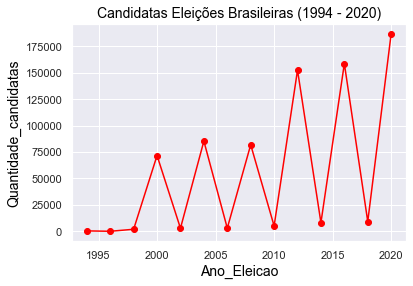

In [14]:
# Gerando gráfico da variação de mulheres nas eleições brasileiras, usando a tabela anterior
plt.plot(tabela_fem['Ano_Eleicao'], tabela_fem['Quantidade_candidatas'], color='red', marker='o')
plt.title('Candidatas Eleições Brasileiras (1994 - 2020)', color='black', fontsize=14)
plt.xlabel('Ano_Eleicao',color='black', fontsize=14)
plt.ylabel('Quantidade_candidatas',color='black', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
# Contando quantas pessoas do gênero masculino tinham por ano e salvando em uma lista

ano = 1994
lista = []

while ano <= 2020:
    for i in range(1994,2022,2):
        i == ano
        filtro_ano = cand2.loc[lambda cand2: cand2['ano'] == i]
        qtd_ano = len(filtro_ano[filtro_ano['genero'].str.contains('masculino') == True])
        lista.append(qtd_ano)
        ano += 2
print(lista)

[5044, 0, 13199, 311928, 16787, 316085, 17771, 302555, 17481, 331141, 18067, 339380, 19882, 370513]


In [16]:
# Verificando se a quantidade de dados esta correta
len(lista)

14

In [17]:
# Gerando uma tabela com os anos eleitorais e os dados da lista anterior, para gerar gráficos.
info_masc =[[1994,5044], [1996,0],[1998,13199],[2000,311928],[2002,16787],[2004,316085],[2006,17771],[2008,302555],[2010,17481],[2012,331141],[2014,18067],[2016, 339380],[2018,19882],[2020, 370513]]
tabela_masc = pd.DataFrame(info_masc, columns = ['Ano_Eleicao', 'Quantidade_candidatos'])
print(tabela_masc)

    Ano_Eleicao  Quantidade_candidatos
0          1994                   5044
1          1996                      0
2          1998                  13199
3          2000                 311928
4          2002                  16787
5          2004                 316085
6          2006                  17771
7          2008                 302555
8          2010                  17481
9          2012                 331141
10         2014                  18067
11         2016                 339380
12         2018                  19882
13         2020                 370513


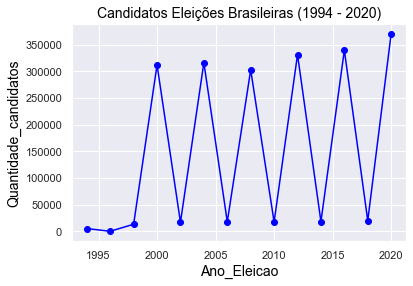

In [18]:
# Gerando gráfico da variação da quantidade de homens nas eleições brasileiras, usando a tabela anterior
plt.plot(tabela_masc['Ano_Eleicao'], tabela_masc['Quantidade_candidatos'], color='blue', marker='o')
plt.title('Candidatos Eleições Brasileiras (1994 - 2020)', color='black', fontsize=14)
plt.xlabel('Ano_Eleicao',color='black', fontsize=14)
plt.ylabel('Quantidade_candidatos', color='black', fontsize=14)
plt.grid(True)
plt.show()

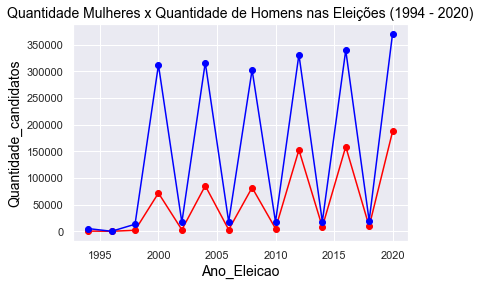

In [19]:
# Junção dos dois gráficos anteriores
plt.plot(tabela_fem['Ano_Eleicao'], tabela_fem['Quantidade_candidatas'], color='red', marker='o')
plt.plot(tabela_masc['Ano_Eleicao'], tabela_masc['Quantidade_candidatos'], color='blue', marker='o')
plt.title('Quantidade Mulheres x Quantidade de Homens nas Eleições (1994 - 2020)', color='black', fontsize=14)
plt.xlabel('Ano_Eleicao',color='black', fontsize=14)
plt.ylabel('Quantidade_candidatos', color='black', fontsize=14)
plt.grid(True)
plt.show()

**"Conclusão da primeira parte"**

*Concluímos, com esse pequeno estudo dos dados focados no gênero, que existe quase uma constância no
gráfico da quantidade de homens que participam das eleições ao longo dos anos e ver que, apesar da 
quantidade de mulheres terem aumentado mais de 500% de 1994 à 2020, o aumento da participação das 
mulheres na política é lento, porém, gradativo.*

In [20]:
# Separar genero feminino e escolaridade
inst_fem = cand2[cand2['genero'].str.contains('feminino') == True]
inst_fem

,ano,genero,instrucao
19,1994,feminino,NaN
25,1994,feminino,NaN
59,1994,feminino,NaN
70,1994,feminino,NaN
76,1994,feminino,NaN
...,...,...,...
2858285,2020,feminino,ensino medio completo
2858286,2020,feminino,ensino fundamental completo
2858290,2020,feminino,ensino medio completo
2858291,2020,feminino,ensino superior completo


In [21]:
# Porcentagem de mulheres por escolaridade
inst_fem['instrucao'].value_counts(normalize=True)*100

ensino medio completo            36.287153
ensino superior completo         25.617279
ensino fundamental incompleto    12.760082
ensino fundamental completo      11.381487
ensino superior incompleto        5.670653
ensino medio incompleto           5.519744
le e escreve                      2.754179
analfabeto                        0.009424
Name: instrucao, dtype: float64

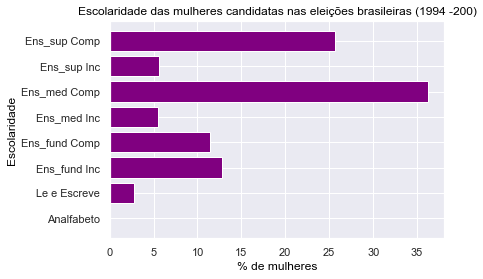

In [22]:
#Gráfico da tabela anterior
ensino_fem = ['Analfabeto','Le e Escreve','Ens_fund Inc','Ens_fund Comp','Ens_med Inc','Ens_med Comp','Ens_sup Inc','Ens_sup Comp']
dados_fem = [0.01,2.75,12.76,11.38,5.52,36.29,5.67,25.62]
plt.barh(ensino_fem,dados_fem, color='purple')
plt.ylabel('Escolaridade', color='black')
plt.xlabel('% de mulheres',color='black')
plt.title('Escolaridade das mulheres candidatas nas eleições brasileiras (1994 -200)',color='black')
plt.show()

In [23]:
# Separar genero masculino e escolaridade
inst_masc = cand2[cand2['genero'].str.contains('masculino') == True]
inst_masc

,ano,genero,instrucao
0,1994,masculino,NaN
1,1994,masculino,NaN
2,1994,masculino,NaN
3,1994,masculino,NaN
4,1994,masculino,NaN
...,...,...,...
2858289,2020,masculino,ensino fundamental completo
2858292,2020,masculino,ensino medio completo
2858293,2020,masculino,ensino medio completo
2858294,2020,masculino,ensino medio completo


In [24]:
# Porcentagem de homens por escolaridade
inst_masc['instrucao'].value_counts(normalize=True)*100

ensino medio completo            31.395807
ensino fundamental incompleto    20.310154
ensino superior completo         18.883812
ensino fundamental completo      14.529773
ensino medio incompleto           6.041210
ensino superior incompleto        4.908574
le e escreve                      3.913456
analfabeto                        0.017214
Name: instrucao, dtype: float64

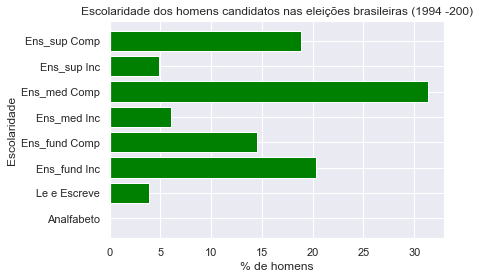

In [25]:
#Gráfico da tabela anterior
ensino_masc = ['Analfabeto','Le e Escreve','Ens_fund Inc','Ens_fund Comp','Ens_med Inc','Ens_med Comp','Ens_sup Inc','Ens_sup Comp']
dados_masc = [0.01,3.91,20.31,14.53,6.04,31.40,4.90,18.88]
plt.barh(ensino_masc,dados_masc, color='green')
plt.ylabel('Escolaridade')
plt.xlabel('% de homens')
plt.title('Escolaridade dos homens candidatos nas eleições brasileiras (1994 -200)')
plt.show()

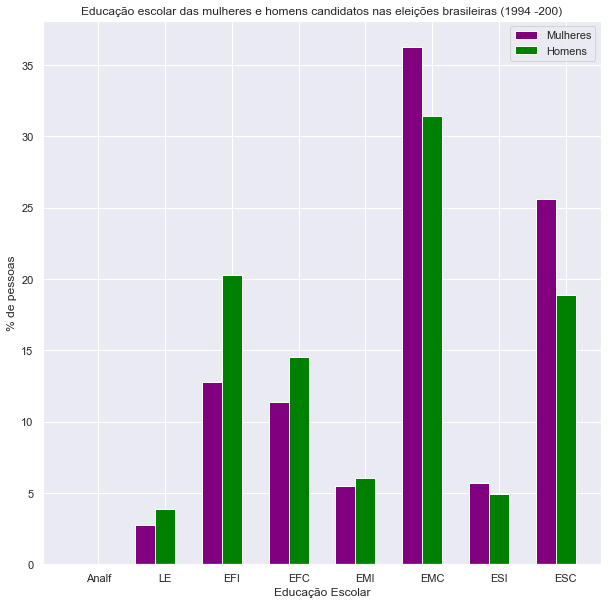

In [26]:
# Gráfico comparando o grau de escolaridade entre os candidatos homens e mulheres

dados_fem = [0.01,2.75,12.76,11.38,5.52,36.29,5.67,25.62]
dados_masc = [0.01,3.91,20.31,14.53,6.04,31.40,4.90,18.88]

barWidth = 0.3 #largura das barras
plt.figure(figsize=(10,10)) #aumentando o gráfico

r1 = np.arange(len(dados_fem))
r2 = [x + barWidth for x in r1]

plt.bar(r1, dados_fem, color='purple', width=barWidth, label='Mulheres')
plt.bar(r2, dados_masc, color='green', width=barWidth, label='Homens')

plt.ylabel('% de pessoas')
plt.xticks([r + barWidth for r in range(len(dados_fem))], ['Analf','LE','EFI','EFC','EMI','EMC','ESI','ESC'])
plt.xlabel('Educação Escolar')
plt.title('Educação escolar das mulheres e homens candidatos nas eleições brasileiras (1994 -200)')

plt.legend()
plt.show()

Analf = Analfabeto

LE = Lê e escreve

EFI = Ensino Fundamental Incompleto

EFC = Ensino Fundamental Completo

EMI = Ensino Médio Incompleto

EMC = Ensino Médio Completo

ESI = Ensino Superior Incompleto

ESC = Ensino Superior Completo
  

**"Conclusão da segunda parte"**

*Neste estudo, analisamos a escolaridade dos candidatos homens e mulheres separados. No último
gráfico podemos perceber que a maioria dos candidatos, seja homem ou mulher, só cursaram até o
ensino médio e a falta de educação e escolaridade dos políticos, refletem, nitidamente na população.*